In [1]:
import pandas as pd
import numpy as np
import bilby
import pickle
import corner

import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [3]:
my_color = '#4c7f7f'

In [4]:
default_kwargs = dict(
            bins=50, smooth=0.9,
            smooth1d=0.8,
            show_titles=True,
            title_kwargs=dict(fontsize=21),
            title_fmt='.2f',
            title_quantiles=[0.16,0.5,0.84],
            color=my_color, 
            label_kwargs = dict(color = 'black', fontsize = 30), 
            truth_color='black', quantiles=[0.16, 0.84],
            levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
            plot_density=False, plot_datapoints=True, fill_contours=True,
            max_n_ticks=3, labelpad=0.1
            )

In [5]:
def plot_corner(data, injected_values, labels, title_labels, plot_name, lbl_size=21, figsize=(6, 6), **kwargs):
    figure = corner.corner(
        data, 
        truths=injected_values, 
        labels=labels, 
        titles=title_labels, 
        rect=[0, 0, 1, 1],
        figsize=figsize,
        **kwargs
    )
    
    # Adjust tick parameters for all axes
    for ax in figure.get_axes():
        ax.tick_params(axis='both', labelsize=lbl_size)
    
    # Force a tight layout by adjusting subplot spacing
    figure.subplots_adjust(wspace=0, hspace=0)
    plt.subplots_adjust(left=0.075, bottom=0.075, right=0.99, top=0.99)
    # Save the plot to a file
    plt.savefig(f'plots/{plot_name}.pdf')
    
    # Display the plot
    plt.show()

In [6]:
cosmo_corner_lbs = ['$H_0$\n [km s$^{-1}$ Mpc$^{-1}$]', 
              '$\\Omega_{\\rm m,0}$', 
              '$\\alpha$', 
              '$\\beta$', 
              '$m_{\\rm min}$\n [$M_{\odot}$]', 
              '$m_{\\rm max}$\n [$M_{\odot}$]', 
              '$\\delta m$\n [$M_{\odot}$]', 
              '$\\mu_{\\rm g}$\n [$M_{\odot}$]', 
              '$\\sigma_{\\rm g}$\n [$M_{\odot}$]', 
              '$\\lambda_{\\rm peak}$', 
              '$\gamma$', 
              '$\kappa$', 
              '$z_{\\rm p}$', 
              '$R_0$\n [Gpc$^{-3}$yr$^{-1}$]']
cosmo_title_labels = ['$H_0$', 
              '$\\Omega_{\\rm m,0}$', 
              '$\\alpha$', 
              '$\\beta$', 
              '$m_{\\rm min}$', 
              '$m_{\\rm max}$', 
              '$\\delta m$', 
              '$\\mu_{\\rm g}$', 
              '$\\sigma_{\\rm g}$', 
              '$\\lambda_{\\rm peak}$', 
              '$\gamma$', 
              '$\kappa$', 
              '$z_{\\rm p}$', 
              '$R_0$']

In [7]:
injected_values_vanilla = pd.DataFrame.from_dict({'H0':67.8*np.ones(1), 
                   'Om0':0.3*np.ones(1),
                   'alpha':3.4*np.ones(1),
                   'beta':0.8*np.ones(1),
                   'mmin':5*np.ones(1),
                   'mmax':100*np.ones(1),
                   'delta_m':4.8*np.ones(1),
                   'mu_g':35*np.ones(1),
                   'sigma_g':3.9*np.ones(1),
                   'lambda_peak':0.04*np.ones(1),
                   'gamma':2.7*np.ones(1),
                   'kappa':2.9*np.ones(1),
                   'zp':1.9*np.ones(1),
                   'R0':20*np.ones(1)})
injected_values_redshift = pd.DataFrame.from_dict({'H0':173.28*np.ones(1), 
                   'Om0':0.3*np.ones(1), 
                   'alpha':5.325*np.ones(1), 
                   'beta':3.05*np.ones(1),  
                   'mmin':7.8*np.ones(1),  
                   'mmax':87.58*np.ones(1), 
                   'delta_m':3.19*np.ones(1), 
                   'mu_g':40.9*np.ones(1), 
                   'sigma_g':7.63*np.ones(1), 
                   'lambda_peak':0.04*np.ones(1), 
                   'gamma':0.03*np.ones(1), 
                   'kappa':2.92*np.ones(1), 
                   'zp':3.86*np.ones(1), 
                   'R0':16.1*np.ones(1)})

In [8]:
cosmo_params = ['H0', 'Om0', 'alpha', 'beta', 'mmin', 'mmax', 'delta_m', 'mu_g', 
                'sigma_g', 'lambda_peak', 'gamma', 'kappa', 'zp', 'R0']

### Vanilla case

In [9]:
# load dictionary of events
case1_dictionary_path = 'data/case1_events_dictionary.pkl'
with open(case1_dictionary_path, 'rb') as f:
    case1_dict = pickle.load(f)
    
path_to_vanilla_pe = case1_dict['case1_inj_number']['case1_1e6inj_286ev']
vanilla_cosmo_pe = bilby.core.result.read_in_result(path_to_vanilla_pe).posterior
vanilla_cosmo_pe_sel = vanilla_cosmo_pe[cosmo_params]

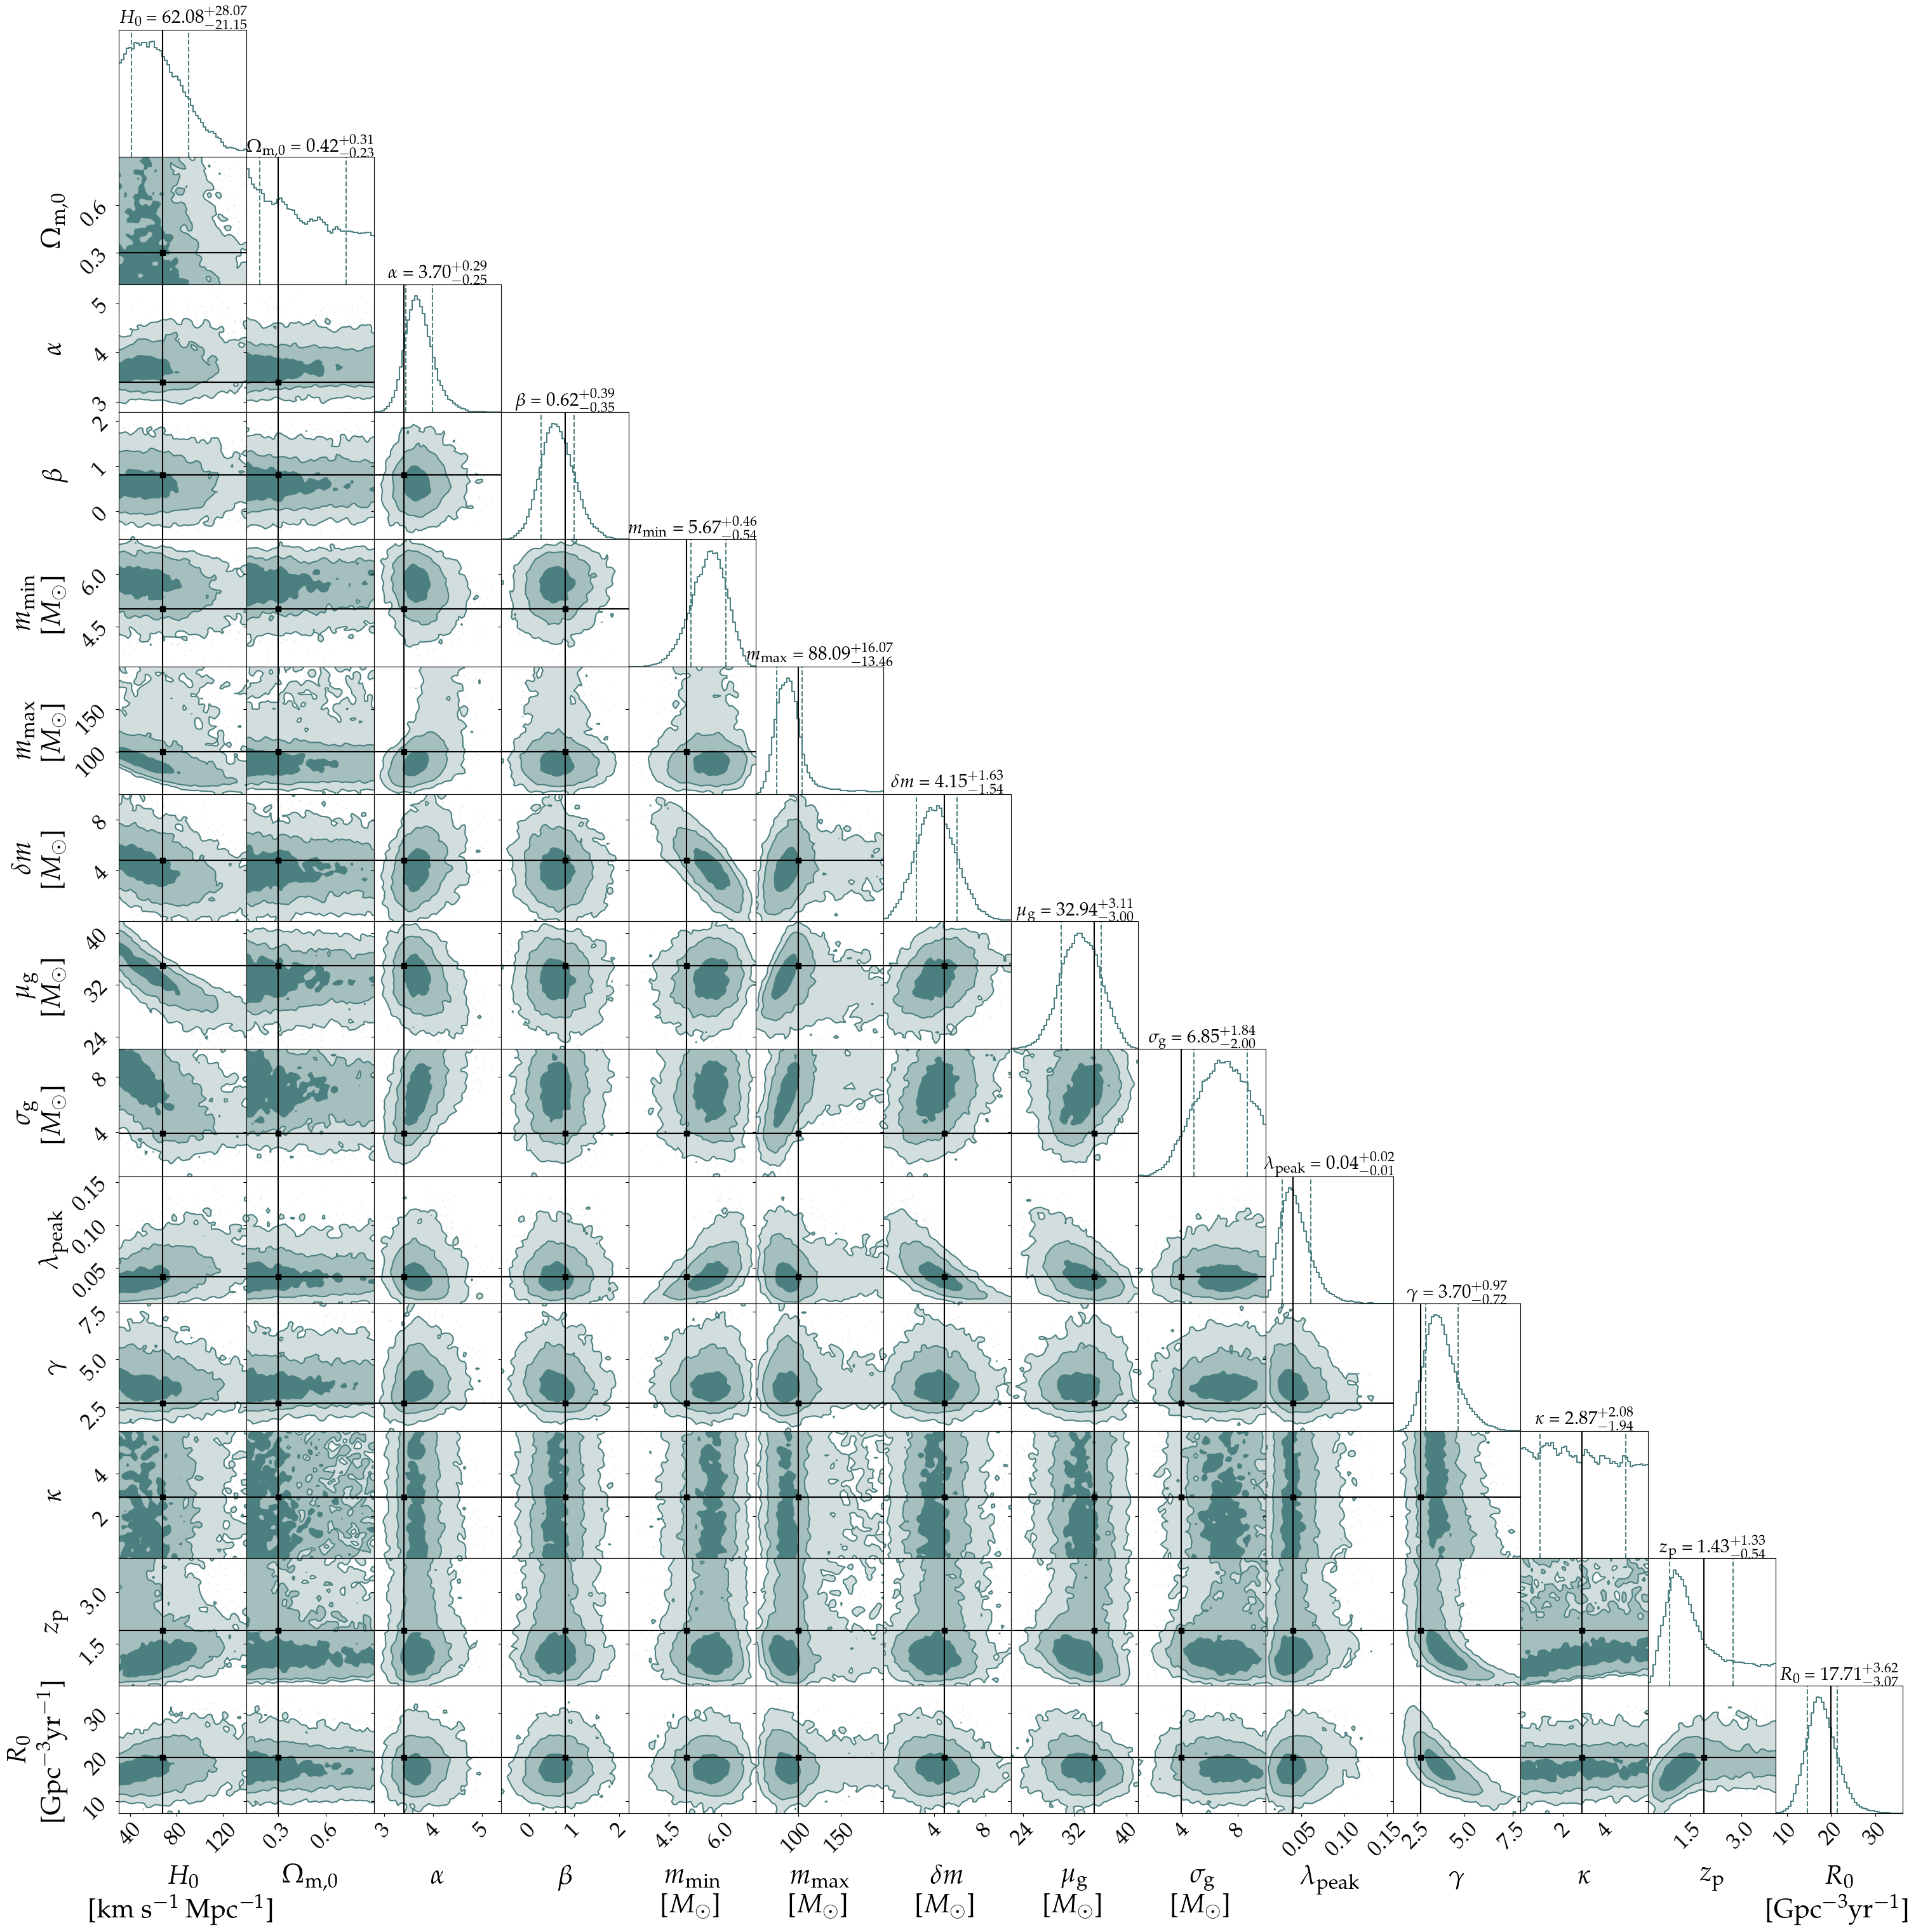

In [10]:
plot_corner(vanilla_cosmo_pe_sel, injected_values_vanilla.iloc[0].to_numpy(), 
            cosmo_corner_lbs, cosmo_title_labels, 'vanilla_cosmo_corner', 
            lbl_size=25, figsize=(20, 20), **default_kwargs)

### Redshift-Dependent case

In [11]:
# load dictionary of events
case2_dictionary_path = 'data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)
    
path_to_redshift_pe = case2_dict['case2_inj_number']['case2_1e6inj_80ev']
redshift_cosmo_pe = bilby.core.result.read_in_result(path_to_redshift_pe).posterior
redshift_cosmo_pe_sel = redshift_cosmo_pe[cosmo_params]

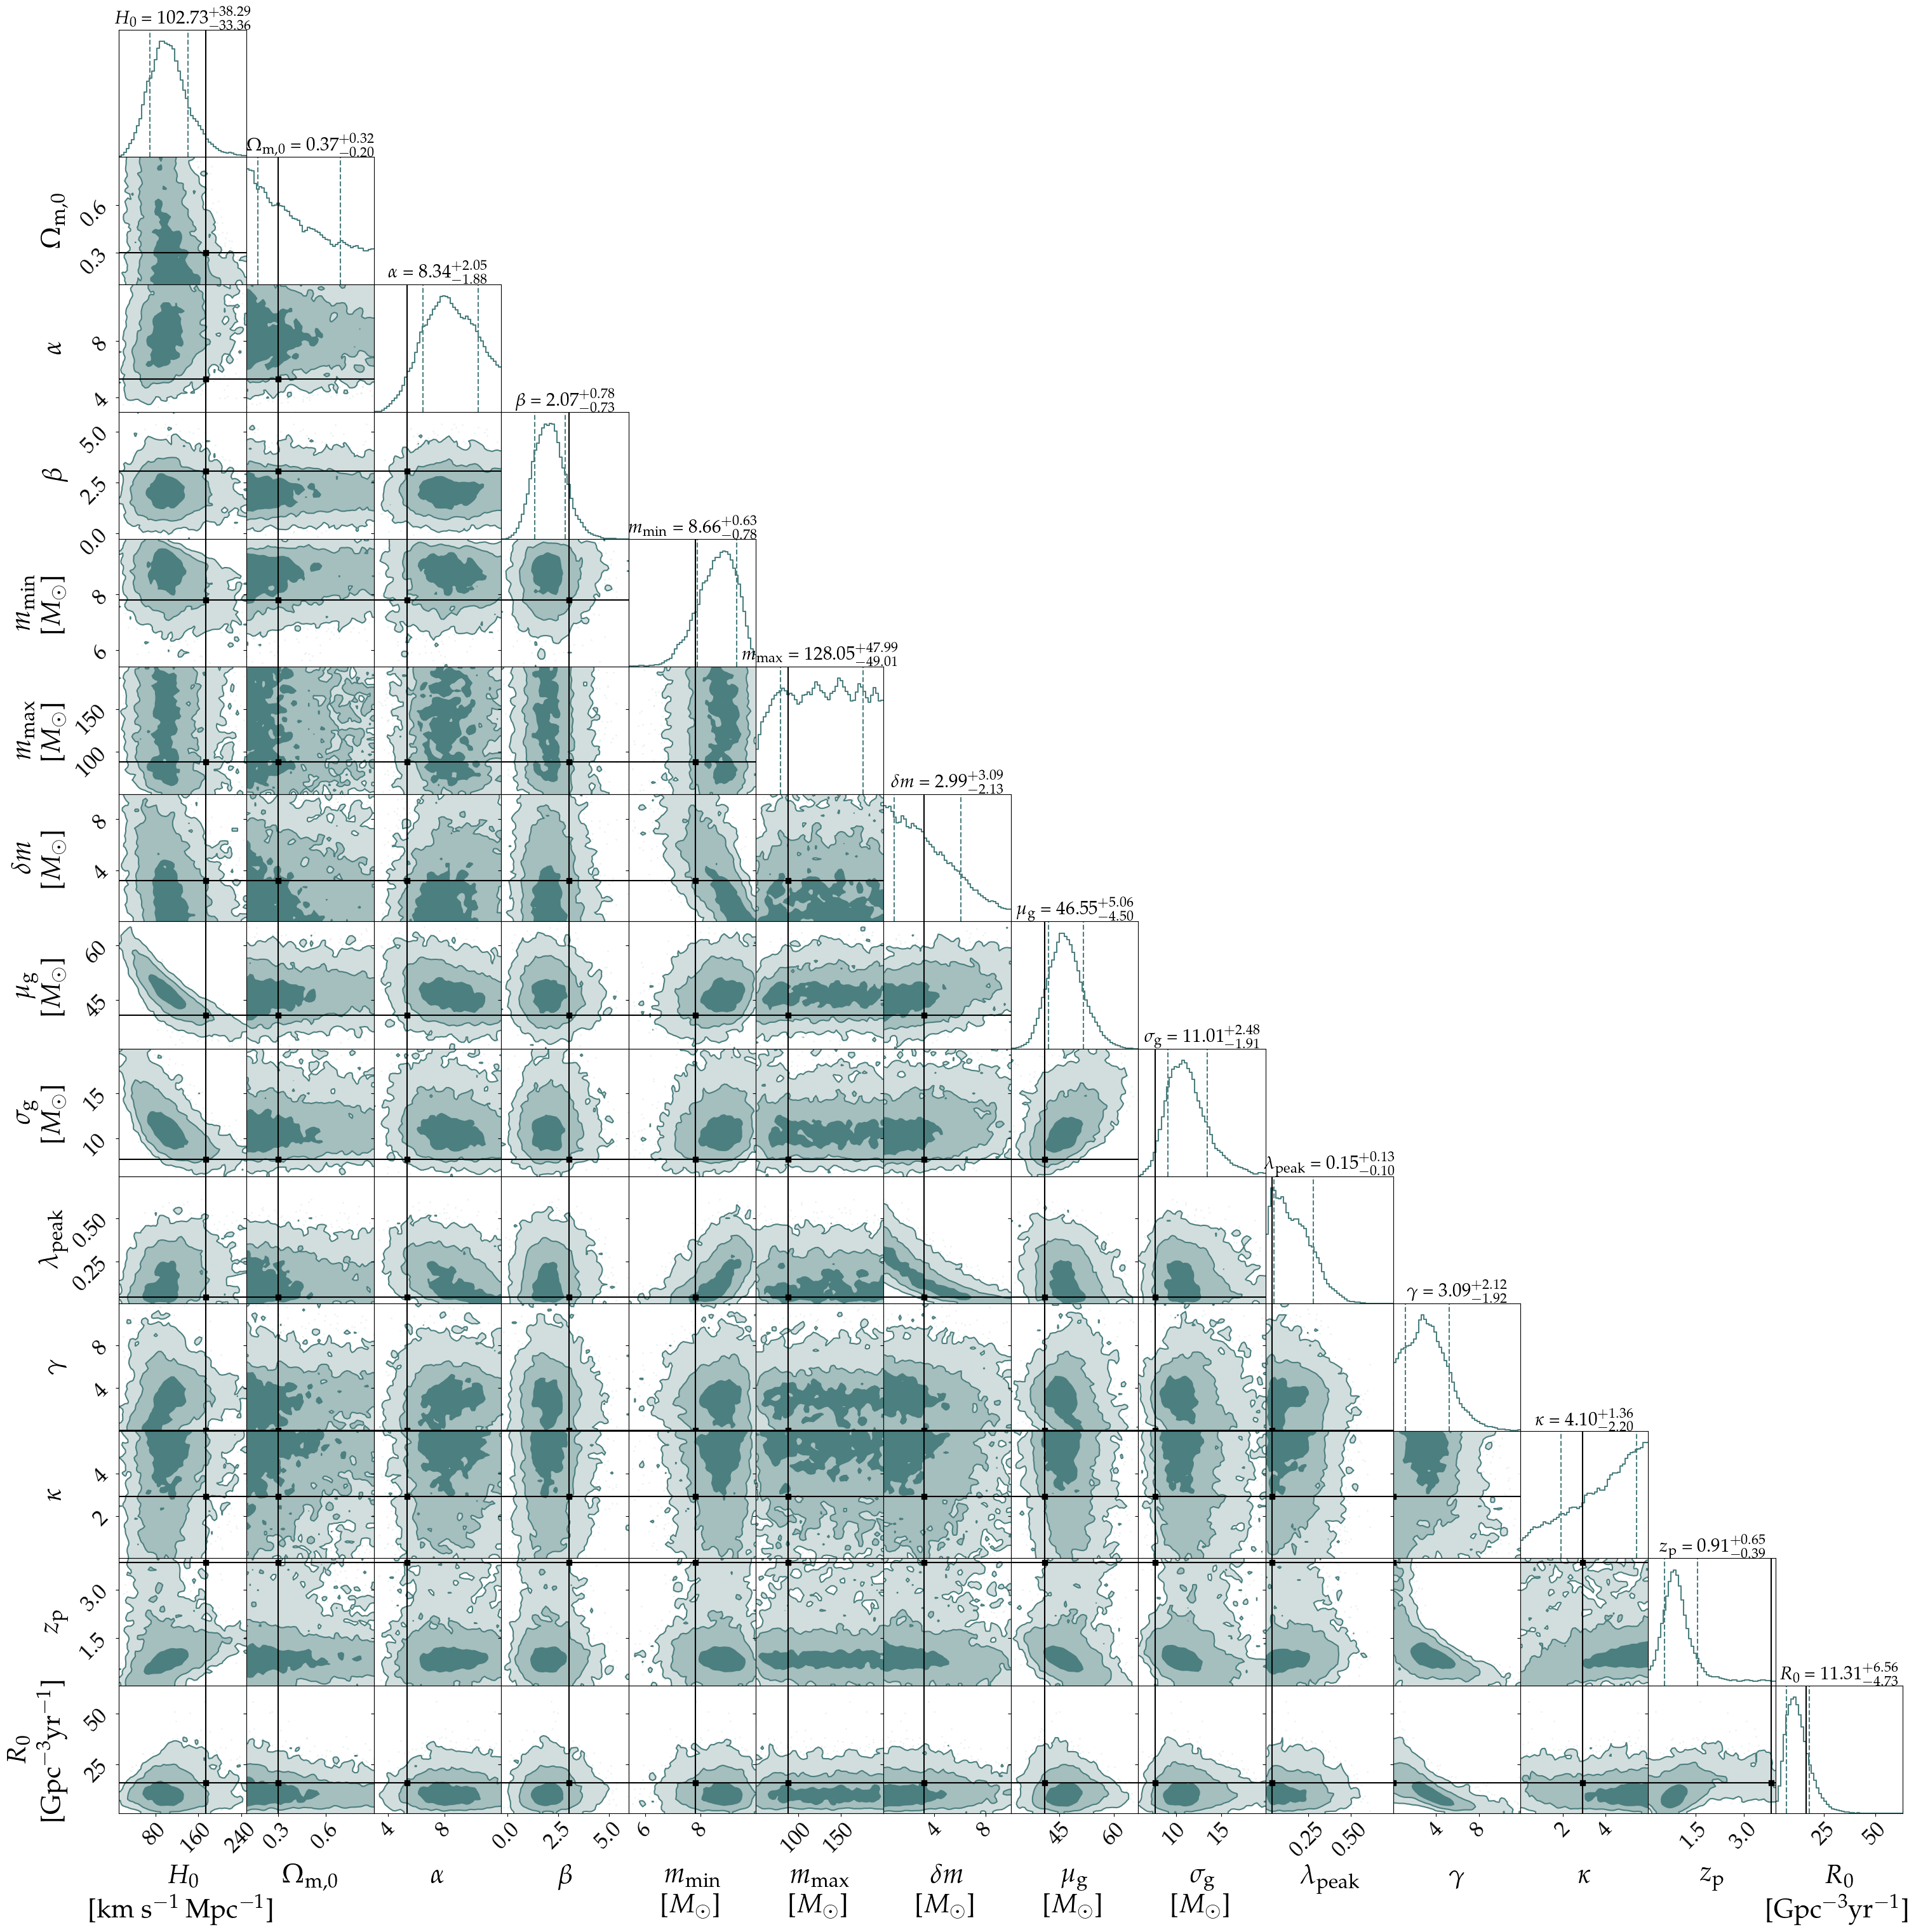

In [12]:
plot_corner(redshift_cosmo_pe_sel, injected_values_redshift.iloc[0].to_numpy(), 
            cosmo_corner_lbs, cosmo_title_labels, 'redshift_cosmo_corner', 
            lbl_size=25, figsize=(20, 20),  **default_kwargs)